# Сегментация пользователей "Метанпромбанка" по потреблению


В банке "Метанпромбанк" наблюдается большой отток клиентов. В связи с этим отделу маркетинга необходимо выделить сегменты отточных клиентов в зависимости от количества потребляемого продукта. 

**Цель исследования**

Анализ клиентов банка и сегментация пользователей по количеству потребляемых продуктов, для определения тех сегментов пользователей, воздействие на которые повлечет снижение оттока клиентов:

 - Проведите исследовательского анализа данных;
 - Сегментация пользователей, на основе данных о количестве потребляемых продуктов;
 - Формулировка и проверка статистических гипотез:
    - гипотеза различия возраста между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;
    - гипотеза различия баллов кредитного скоринга ушедших и оставшихся клиентов.
 - Создание презентации по полученным выводам;
 - Создание дашборда


**Ход исследования**

1. *Обзор и предобработка данных*:

 - Загрузка и знакомство с данными;
 - Проверка данных на наличие пропусков, дублей, соответствие типов, данных и наименование столбцов;
 - Оценка влияния выявленных недочетов в данных на ход исследования, а также поиск решения возможного исправления недочетов;
 - Определение выбросов и аномальных значений, принятие решения о дальнейшей работе с ними.
 

2. *Исследовательский анализ данных*

 - Исследование признаков и определение их влияния на отток клиентов;
 - Постройка графиков и гистограмм распределения;
 - Корреляционный анализ.
 

3. *Сегментация*

 - Сегментация клиентов, на основе изученных данных;
 - Выявление отличительных черт получившихся групп;
 - Постройка графиков и гистограмм распределения;
 - Определение приоритетных сегментов по оттоку клиентов.


4. *Проверка гипотез*

  - проверка 2 гипотез (проверка распределения на нормальность, определение нулевой и альтернативной гипотезы)
  

5. *Выводы и рекомендации*

  - Определение признаков, наиболее влияющие на отток клиентов;
  - Рекомендации заказчику
  

6. *Презентация и дашборд*
  - Создание презентации:
    - Титульный лист;
    - Содержание;  
    - Представление факторов, влияющих на отток;
    - Представление выбранных сегментов;
    - Представление гипотез;
    - Рекомендации заказчику по снижению оттока клиентов в зависимости от сегмента;
    - Завершающая страница.
  - Дашборд

**Презентация**

Ссылка на презентацию: https://drive.google.com/file/d/1bVKpBGtv6qt5A3zlGsfdMMFI1QlRAO3a/view?usp=drive_link

**Дашборд - Количество клиентов в зависимости от числа используемых продуктов**

https://public.tableau.com/app/profile/.77306772/viz/_16954045836720/Dashboard1?publish=yes

## Обзор и предобработка данных

In [1]:
#Импорт необходимых библиотек
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings; warnings.filterwarnings(action = 'ignore')
from scipy import stats as st

In [2]:
#Чтение файла
try:
    data = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
#Задаем размер графиков
sns.set(rc={'figure.figsize':(12,5)})

#Устанавливаем ограничения на количество знаков после запятой
pd.options.display.float_format = '{:,.2f}'.format

#Снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

#Снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

In [4]:
#Вывод информации о таблице
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,Ж,68.00,3,"865,457.97",3,0,1,"86,874.90",0


**Вывод**

Датасет состоит из 10000 строк. В таблице корректно отображаются типы данных, есть как числовые так и категориальные данные. В датасете присутствуют пропуски в столбцах 'age' и 'balance'. Также необходимо привести наименование столбцов к "змеиному" регистру

In [5]:
#Приведение названия столбцов к "змеиному" регистру
data = data.rename(columns={'USERID' : 'user_id', 'EST_SALARY': 'est_salary'})

В данных имеются категориальные данные. Данные в столбце 'gender' можно заменить на бинарные данные Ж на 0, М на 1

In [6]:
#Засена котегариальных данных в столбце 'gender'
data['gender'] = data['gender'].replace('Ж','0').replace('М','1').astype('int')

In [7]:
#Проверка на наличие пропусков
data.isna().sum().sort_values(ascending=False)

balance          2295
age                26
user_id             0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [8]:
#Проверка на наличие дубликатов
print ('Количество дублей:', data.duplicated().sum())
print ('Доля дублей в датафрейме:', '{:.1%}'.format(data.duplicated().sum()/len(data)))

Количество дублей: 0
Доля дублей в датафрейме: 0.0%


In [9]:
#Создание датафрейма с дубликатами 
duplicate_user_id = data[data.duplicated(['user_id'])]
duplicate_user_id.sort_values('user_id', ascending=True)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887.00,Ярославль,0,38.00,0,NaN,1,0,1,"119,247.61",0
7542,117943,880.00,Ярославль,0,40.00,0,NaN,1,1,0,"137,718.93",0
5896,120258,905.00,Ярославль,1,30.00,0,NaN,1,1,1,"146,427.96",0
8638,123461,934.00,Рыбинск,1,34.00,0,NaN,2,1,0,"291,619.27",0
9775,124450,758.00,Рыбинск,0,36.00,0,"73,574.07",2,0,1,"79,963.59",0
...,...,...,...,...,...,...,...,...,...,...,...,...
9104,222480,776.00,Рыбинск,0,NaN,5,"796,735.09",1,1,1,"55,073.63",0
8070,226550,940.00,Рыбинск,1,NaN,0,NaN,1,0,1,"147,696.95",0
4216,226719,903.00,Рыбинск,0,63.00,0,NaN,1,1,0,"138,582.58",0
8497,227795,839.00,Ярославль,1,34.00,2,"326,593.14",2,1,0,"103,314.92",0


**Вывод**

В датафрейме есть 73 дубля по полю 'user_id'. Рассмотрим некоторые значения из данных дублей

In [10]:
#Вывод дублей
data.loc[(data['user_id'] == 123461)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1411,123461,829.00,Ярославль,0,59.00,0,"96,222.44",2,0,1,"102,771.55",1
8638,123461,934.00,Рыбинск,1,34.00,0,NaN,2,1,0,"291,619.27",0


In [11]:
#Вывод дублей
data.loc[(data['user_id'] == 222480)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6446,222480,776.00,Ярославль,0,38.00,5,"823,145.83",2,1,1,"55,777.44",0
9104,222480,776.00,Рыбинск,0,NaN,5,"796,735.09",1,1,1,"55,073.63",0


In [12]:
#Вывод дублей
data.loc[(data['user_id'] == 227795)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8205,227795,840.00,Рыбинск,1,34.00,2,"350,768.03",1,1,0,"102,036.14",1
8497,227795,839.00,Ярославль,1,34.00,2,"326,593.14",2,1,0,"103,314.92",0


**Вывод**

Некоторые 'user_id' имеют как абсолютно разные значения (user 123461 в Ярославле - Женщина в возрасте 59 лет, в Рыбинске - Мужчина в возрасте 34 года), так и очень похожие (user 227795 в Ярославле и Рыбинске это Мужчина в возрасте 34 года со схожими показателями баланса и заработной платы). Я бы не стал удалять пользователей по user_id, т.к. дублироваться может как в случае технической ошибки (user 123461), так и возможен вариант с тем, что один клиент является пользователем услуг банка в разных городах

Рассмотрим содержание столбцов датафрейма

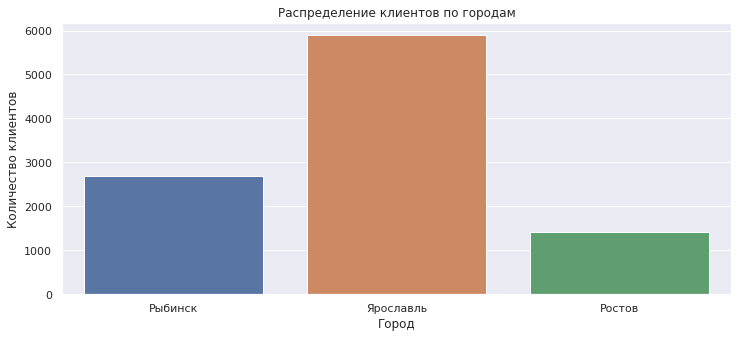

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

In [13]:
#Создание графика
sns.countplot(x = 'city', data = data)
plt.title('Распределение клиентов по городам')
plt.ylabel('Количество клиентов')
plt.xlabel('Город')
plt.show()

#Вывод содержания столбца 'city'
data['city'].value_counts()

В столбце 'city' имеются категориальные данные о трех городах, мы не можем их заменить на числовые значения, поэтому выделим названия в отдельные столбцы с бинарными данными

In [14]:
#Создание дополнительных столбцов
data['city_2']=data['city']
data = pd.get_dummies(data, columns = ['city_2'])
data = data.rename (columns = ({'city_2_Ростов':'Ростов', 'city_2_Рыбинск':'Рыбинск','city_2_Ярославль':'Ярославль'}))
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
0,183012,850.00,Рыбинск,0,25.00,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0
1,146556,861.00,Рыбинск,0,37.00,5,"850,594.33",3,1,0,"86,621.77",0,0,1,0
2,120722,892.00,Рыбинск,0,30.00,0,NaN,1,1,1,"107,683.34",0,0,1,0
3,225363,866.00,Ярославль,0,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,1
4,157978,730.00,Ярославль,1,34.00,5,174.00,1,1,0,"67,353.16",1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,1,27.00,1,"78,144.65",1,0,1,"18,943.64",0,0,1,0
9996,139170,894.00,Ярославль,1,46.00,0,NaN,1,1,0,"196,898.29",0,0,0,1
9997,115639,903.00,Ярославль,1,24.00,0,NaN,2,1,1,"108,905.09",0,0,0,1
9998,148700,777.00,Ярославль,0,68.00,3,"865,457.97",3,0,1,"86,874.90",0,0,0,1


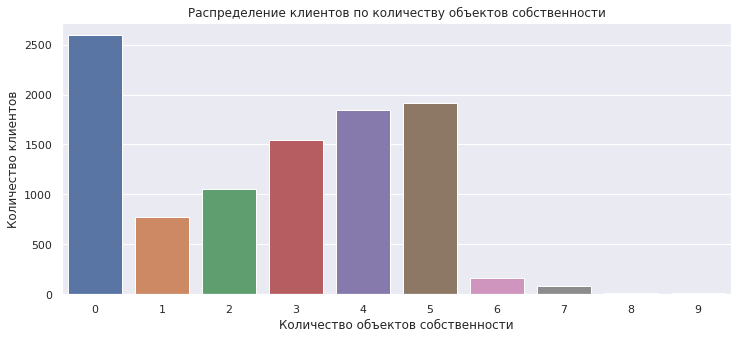

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

In [15]:
#Создание графика
sns.countplot(x = 'equity', data = data)
plt.title('Распределение клиентов по количеству объектов собственности')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество объектов собственности')
plt.show()

#Вывод содержания столбца 'equity'
data['equity'].value_counts()

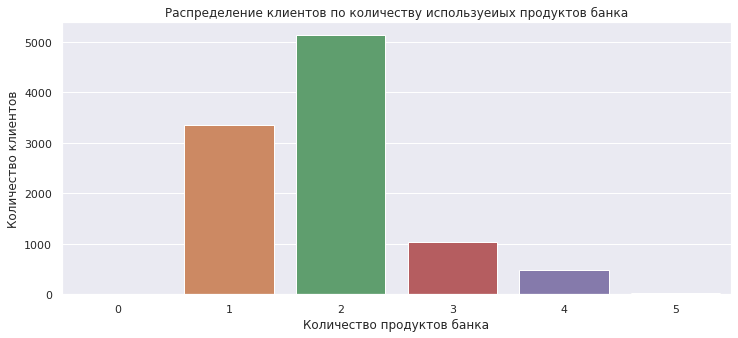

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

In [16]:
#Создание графика
sns.countplot(x = 'products', data = data)
plt.title('Распределение клиентов по количеству используеиых продуктов банка')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов банка')
plt.show()

#Вывод содержания столбца 'products'
data['products'].value_counts()

In [17]:
#Вывод содержания столбца 'gender'
data['gender'].value_counts()

1    5005
0    4995
Name: gender, dtype: int64

**Вывод**

В дататасете присутствуют данные по трем городам (Ярославль, Рыбинск, Ростов). Больше половины клиентов из Ярославля (5888). Так же в данных преобладают пользователи без указания залоговой недвижимости (2592). Большинство клиентов пользуются 2 продуктами банка (5126). Количество клиентов-мужчин практически совпадает с количеством клиентов-женщин.

Рассмотрим пропуски в данных

In [18]:
#Создание и вывод датафрейма клиентов без указания возраста
data_witnout_age = data[data['age'].isnull()]
data_witnout_age.head(26)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
1247,228075,932.00,Ярославль,1,NaN,5,"7,601,719.20",2,1,1,"408,121.16",0,0,0,1
2165,187635,692.00,Рыбинск,0,NaN,0,NaN,1,1,1,"160,368.82",0,0,1,0
2444,221156,913.00,Ярославль,1,NaN,0,NaN,1,1,1,"135,693.24",0,0,0,1
3091,138660,836.00,Ростов,0,NaN,5,"294,315.53",2,0,1,"63,310.22",1,1,0,0
4912,210674,834.00,Рыбинск,1,NaN,1,"238,330.52",2,0,1,"93,775.06",0,0,1,0
5470,218868,827.00,Рыбинск,0,NaN,4,"448,959.07",2,1,1,"67,835.95",0,0,1,0
5495,151662,884.00,Рыбинск,0,NaN,0,NaN,1,1,1,"137,500.77",0,0,1,0
7236,210135,908.00,Рыбинск,0,NaN,4,"1,120,340.31",3,1,1,"85,002.15",0,0,1,0
7248,219343,920.00,Рыбинск,0,NaN,0,NaN,1,1,0,"159,248.67",0,0,1,0
7345,184913,829.00,Ярославль,0,NaN,3,"188,648.77",2,0,1,"75,206.90",0,0,0,1


**Вывод**

В датасете имеется 26 строк, что составляет 0,26% от всех данных. Так как сами мы не можем заполнить данные пропуски, а также с тем, что данный столбец будет использоваться для сегментации, данные пропуски можно удалить

In [19]:
#Удаление пропусков в столбце 'age'
data = data.dropna(subset=['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   int64  
 4   age            9974 non-null   float64
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
 12  Ростов         9974 non-null   uint8  
 13  Рыбинск        9974 non-null   uint8  
 14  Ярославль      9974 non-null   uint8  
dtypes: float64(4), int64(7), object(1), uint8(3)
memory usage: 1.0+ MB


In [20]:
#Создание и вывод датафрейма клиентов без указания баланса
data_witnout_balance = data[data['balance'].isnull()]
data_witnout_balance.head(10)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
2,120722,892.00,Рыбинск,0,30.00,0,NaN,1,1,1,"107,683.34",0,0,1,0
9,133130,906.00,Ярославль,0,67.00,0,NaN,1,0,1,"238,055.53",0,0,0,1
10,148929,927.00,Ростов,1,52.00,0,NaN,1,1,1,"196,820.07",0,1,0,0
11,172184,921.00,Ростов,1,41.00,0,NaN,1,1,1,"217,469.48",0,1,0,0
19,127034,922.00,Рыбинск,0,53.00,0,NaN,1,0,0,"147,094.82",0,0,1,0
21,177415,896.00,Рыбинск,0,47.00,0,NaN,1,0,0,"225,060.35",0,0,1,0
30,155730,946.00,Ярославль,0,47.00,0,NaN,2,1,1,"660,015.85",0,0,0,1
34,205226,944.00,Ярославль,1,35.00,0,NaN,2,1,1,"239,843.39",0,0,0,1
39,173175,924.00,Рыбинск,0,51.00,0,NaN,1,1,1,"248,844.47",0,0,1,0
43,228585,956.00,Ростов,1,41.00,0,NaN,1,1,0,"115,117.10",0,1,0,0


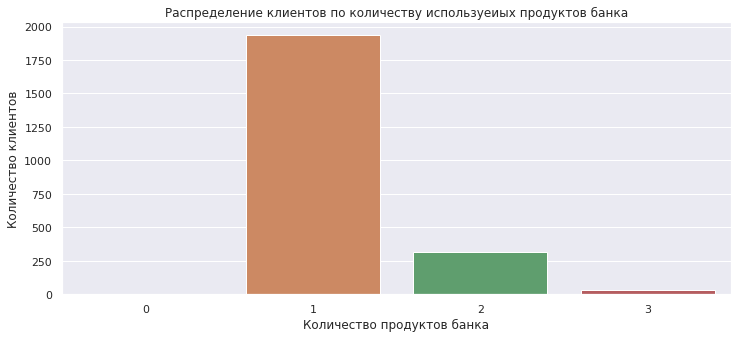

1    1934
2     315
3      29
0       1
Name: products, dtype: int64

In [21]:
#Создание графика
sns.countplot(x = 'products', data = data_witnout_balance)
plt.title('Распределение клиентов по количеству используеиых продуктов банка')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов банка')
plt.show()

#Вывод содержания столбца 'products'
data_witnout_balance['products'].value_counts()

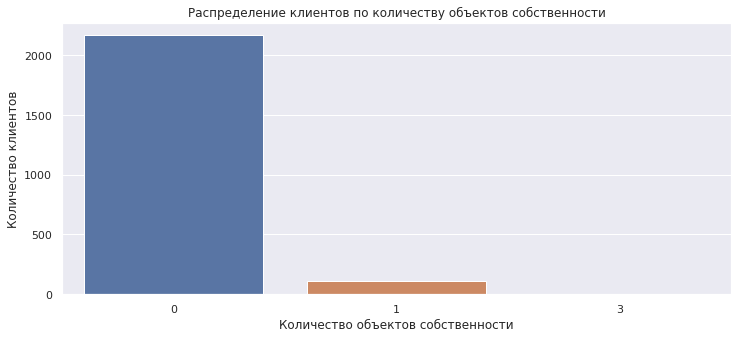

0    2164
1     114
3       1
Name: equity, dtype: int64

In [22]:
#Создание графика
sns.countplot(x = 'equity', data = data_witnout_balance)
plt.title('Распределение клиентов по количеству объектов собственности')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество объектов собственности')
plt.show()

#Вывод содержания столбца 'products'
data_witnout_balance['equity'].value_counts()

In [23]:
#Вывод содержания столбца 'products'
data_witnout_balance['churn'].value_counts()

0    2266
1      13
Name: churn, dtype: int64

**Вывод**

У подавляющего большинства клиентов с отсутствующим балансом, также отсутствует оценка имеющейся собственности, таким образом можно предположить, что это не "залоговые" кредиты (автокредит, ипотека), возможно это потребительский кредит, который был сразу снят или держатели дебетовых карт, а также возможно покупка в рассрочку. Так же стоит отметить, что всего 13 клиентов данной категории из 2266 покинули банк. Таким образом данные пропуски можно оставить т.к. данные пользователи не влияют на показатели оттока, а заполнить данные пропуски "синтетическими" данными мы не можем, так как это сильно исказит среднюю и медиану.

Рассмотрим чесловое описание клиентов без баланса с клиентами у которых есть баланс с помощью метода describe()

In [24]:
#Создание датасета без пропусков в столбце 'balance'
data_with_nan=data.dropna(subset=['balance'])

#Вывод числового описания данных
data_with_nan.describe()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
count,"7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00","7,695.00"
mean,"171,710.89",843.74,0.48,42.92,3.39,"827,245.59",2.08,0.64,0.52,"124,520.39",0.23,0.15,0.27,0.57
std,"33,812.86",55.34,0.50,12.24,1.58,"1,980,327.41",0.76,0.48,0.50,"104,667.11",0.42,0.36,0.45,0.49
min,"94,561.00",689.00,0.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00,0.00,0.00,0.00
25%,"142,638.00",801.00,0.00,33.00,2.00,"295,698.71",2.00,0.00,0.00,"67,556.98",0.00,0.00,0.00,0.00
50%,"172,710.00",840.00,0.00,40.00,4.00,"524,295.33",2.00,1.00,1.00,"106,250.18",0.00,0.00,0.00,1.00
75%,"201,145.50",882.00,1.00,52.00,5.00,"980,051.21",2.00,1.00,1.00,"155,144.60",0.00,0.00,1.00,1.00
max,"229,136.00","1,000.00",1.00,86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00,1.00,1.00,1.00


In [25]:
#Вывод числового описания данных
data_witnout_balance.describe()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
count,"2,279.00","2,279.00","2,279.00","2,279.00","2,279.00",0.00,"2,279.00","2,279.00","2,279.00","2,279.00","2,279.00","2,279.00","2,279.00","2,279.00"
mean,"171,904.89",865.36,0.56,42.09,0.05,NaN,1.16,0.82,0.55,"226,345.42",0.01,0.10,0.26,0.64
std,"33,303.22",89.55,0.50,11.94,0.23,NaN,0.40,0.39,0.50,"199,825.59",0.08,0.30,0.44,0.48
min,"114,182.00",642.00,0.00,18.00,0.00,NaN,0.00,0.00,0.00,"20,274.03",0.00,0.00,0.00,0.00
25%,"142,992.50",871.00,0.00,33.00,0.00,NaN,1.00,1.00,0.00,"120,217.39",0.00,0.00,0.00,0.00
50%,"172,304.00",903.00,1.00,40.00,0.00,NaN,1.00,1.00,1.00,"174,347.87",0.00,0.00,0.00,1.00
75%,"201,257.00",922.00,1.00,49.00,0.00,NaN,1.00,1.00,1.00,"240,372.78",0.00,0.00,1.00,1.00
max,"229,145.00",990.00,1.00,86.00,3.00,NaN,3.00,1.00,1.00,"1,333,687.36",1.00,1.00,1.00,1.00


**Вывод**

'score' - средний скоринг клиентов без баланса (865) выше чем средний скоринг клиентов, у которых есть данные о балансе(843);

'gender' - среди клиентов с балансом количество женщин на 2% выше, чем количество мужчин. Среди клиентов без баланса мужчин на 6% больше чем женщин

'city' - большинство клиентов с балансом проживает в Ярославле (57%), затем Рыбинск (27%) и Ростов (15%). У клиентов без баланса следующие показатели Ярославле (64%), затем Рыбинск (26%) и Ростов (10%); 

'age' - возраст клиентов варьируется от 18 до 86 лет. Средний возраст чуть выше медианного. Средний возраст клиентов без баланса совпадает со средним возрастом клиентов банка;

'equity' - есть клиенты которые не обладают недвижимостью, а есть те, у кого 9 объектов. Среднее значение (2.63) ниже медианного (3), значит в данных преобладают клиенты с количеством объектов недвижимости менее 2. Как было отмечено ранее, клиенты без баланса практически не имеют объектов собственности;

'balance' - среднее значение в более чем, а полтора раза выше медианного, что говорит о значительных выбросах в сторону больших значений в данных;

'products'- в среднем клиенты с балансом пользуются 2 и более продуктами банка. Ранее было установлено, что есть клиенты, которые вообще не пользуются продуктами (1) клиент, встречаются клиенты с 5 продуктами (19 клиентов). Клиенты без баланса чаще всего пользуются одним продуктом банка;

'credit_card' - максимальное количество кредитных карт у клиентов - 1. Клиенты без баланса чаще пользуются кредитными картами, чем в целом клиенты банка;

'last_activity' - встречаются клиенты, которые вообще не проявляют активность. Клиенты без баланса чуть более активны, чем в целом клиенты банка;

'est_salary' - значение заработной платы варьируется от аномально низкого (2 546) до аномально высокого (1 395 064). Среднее значение заметно выше медианного, что говорит о выбросах в сторону больших значений в данных. Средняя заработная плата клиентов без баланса значительно выше чем в целом у клиентов банка;

'churn' - Средний отток клиентов с балансом составляет 23%. Средний отток клиентов без баланса - 1%

Таким образом клиенты без баланса не имеют объектов собственности, чаще всего пользуются одним продуктом банка - кредитные карты, данные клиенты имеют высокую заработную плату. Отток таких клиентов стотавляе 1%. Пропусками в столбце 'balance' вероятнее всего являются пользователи кредитных карт, также мы не можем заполнения их 'синтетическими' данными, без сильного искажения общих результатов, поэтому лучше всё оставить как есть.

В данных наблюдаются значительные выбросы по столбцам с балансом и заработной платой. Также стоит обратить внимание на столбец с количеством используемых продуктов банка, где количество клиентов, попадающих в крайние значения значительно ниже, чем в остальных показателях данного столбца

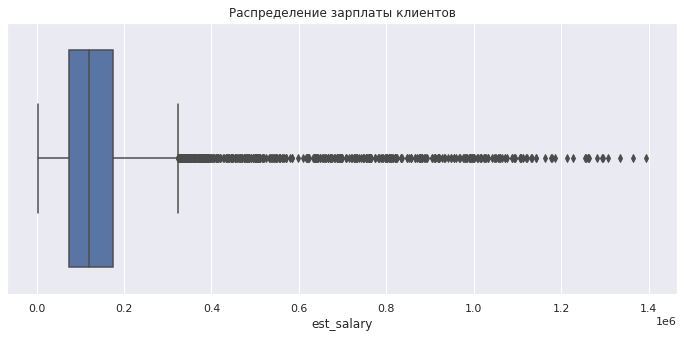

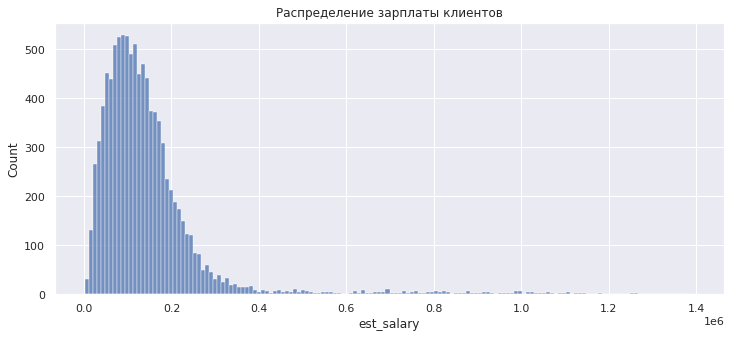

In [26]:
#Создание диаграммы размаха для столбца 'est_salary'
sns.boxplot(x='est_salary',data=data).set(title='Распределение зарплаты клиентов')
plt.show()

#Создание гистограммы для выяления выдиляющихся значений
sns.histplot(data['est_salary']).set(title='Распределение зарплаты клиентов')
plt.show()

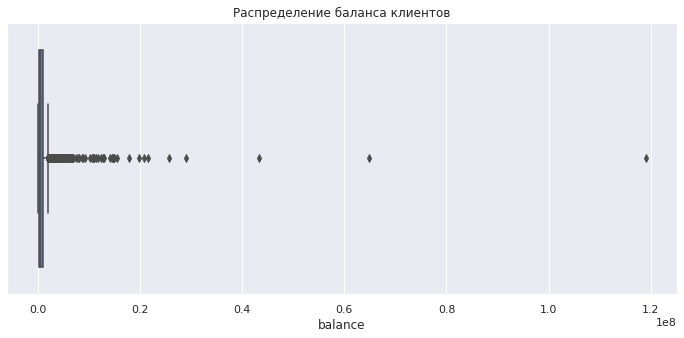

In [27]:
#Создание диаграммы размаха для столбца 'balance'
sns.boxplot(x='balance',data=data).set(title='Распределение баланса клиентов')
plt.show()

**Вывод**

В столбце с заработной платой и балансом имеется значительное количество выбросов. Определим количество и значения, которые можно удалить, не повлияв на качество данных в целом

In [28]:
#Расчет перцентилей по столбцам 'est_salary' и'balance'
data[['est_salary', 'balance']]. quantile (.95)

est_salary     316,360.58
balance      2,114,078.39
Name: 0.95, dtype: float64

 **Вывод**

Не более 5% клиентов зарабатывают больше 316360.58 руб. Учитывая это, а также проанализировав диаграмму размаха, примем данный уровень дохода, за пороговое значение сверхбогатых клиентов. Также к сверхбогатым можно отнести клиентов имеющих большой баланс на счете. Не более 5% клиентов имеют на счете более 2114078.39 руб. В связи с тем, что данные клиенты могут приносить хорошую прибыль, а их баланс может составлять значительные средства банка, выделим их в отдельный датасет VIP-клиентов и изучим их поведение

In [29]:
#Создание датасета сверхбогатых клиентов
data_vip = data.loc[(data['est_salary'] >= data['est_salary'].quantile (.95))|(data['balance'] >= data['balance'].quantile (.95))]

In [30]:
data_vip

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
18,136651,876.00,Ярославль,1,40.00,5,"2,307,947.36",2,0,0,"287,010.61",0,0,0,1
30,155730,946.00,Ярославль,0,47.00,0,NaN,2,1,1,"660,015.85",0,0,0,1
44,210313,935.00,Ярославль,1,41.00,5,"3,781,118.22",2,1,0,"761,349.20",0,0,0,1
59,227642,930.00,Ярославль,0,36.00,0,NaN,2,1,0,"359,081.73",0,0,0,1
63,140749,948.00,Ярославль,0,34.00,5,"3,134,788.66",2,0,0,"199,705.32",0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,163071,961.00,Ярославль,1,38.00,5,"2,298,650.66",4,1,0,"247,334.13",0,0,0,1
9926,117588,852.00,Ярославль,1,39.00,4,"2,357,977.58",2,0,0,"213,535.23",0,0,0,1
9963,187204,957.00,Ярославль,1,35.00,4,"3,431,029.03",4,1,0,"354,987.43",1,0,0,1
9964,148232,968.00,Ярославль,0,32.00,0,NaN,1,1,0,"520,631.22",0,0,0,1


In [31]:
vip = data_vip["est_salary"]
res = data.query("est_salary not in @vip")

In [32]:
#Удаление аномальных значений в столбце 'est_salary' и 'balance'
print('Количество строк до удаления выбросов:', len(data))
vip = data_vip["est_salary"]
data = data.query("est_salary not in @vip")
print('Количество строк после удаления выбросов:', len(data))

Количество строк до удаления выбросов: 9974
Количество строк после удаления выбросов: 9210


In [33]:
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
0,183012,850.00,Рыбинск,0,25.00,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0
1,146556,861.00,Рыбинск,0,37.00,5,"850,594.33",3,1,0,"86,621.77",0,0,1,0
2,120722,892.00,Рыбинск,0,30.00,0,NaN,1,1,1,"107,683.34",0,0,1,0
3,225363,866.00,Ярославль,0,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,1
4,157978,730.00,Ярославль,1,34.00,5,174.00,1,1,0,"67,353.16",1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,1,27.00,1,"78,144.65",1,0,1,"18,943.64",0,0,1,0
9996,139170,894.00,Ярославль,1,46.00,0,NaN,1,1,0,"196,898.29",0,0,0,1
9997,115639,903.00,Ярославль,1,24.00,0,NaN,2,1,1,"108,905.09",0,0,0,1
9998,148700,777.00,Ярославль,0,68.00,3,"865,457.97",3,0,1,"86,874.90",0,0,0,1


In [34]:
#Вывод числового описания данных
data_vip.describe()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
count,764.00,764.00,764.00,764.00,764.00,455.00,764.00,764.00,764.00,764.00,764.00,764.00,764.00,764.00
mean,"172,653.78",894.95,0.61,43.56,2.54,"4,147,673.94",1.91,0.62,0.55,"473,020.93",0.29,0.05,0.21,0.73
std,"34,680.77",75.36,0.49,10.95,2.24,"7,185,234.21",0.95,0.49,0.50,"300,851.82",0.45,0.23,0.41,0.44
min,"97,550.00",686.00,0.00,23.00,0.00,"66,103.84",1.00,0.00,0.00,"21,765.76",0.00,0.00,0.00,0.00
25%,"144,462.75",884.00,0.00,35.00,0.00,"2,263,677.92",1.00,0.00,0.00,"234,816.57",0.00,0.00,0.00,0.00
50%,"172,031.00",919.00,1.00,41.00,3.00,"2,844,342.01",2.00,1.00,1.00,"365,456.09",0.00,0.00,0.00,1.00
75%,"201,732.25",942.25,1.00,51.00,5.00,"3,949,490.63",2.00,1.00,1.00,"681,657.90",1.00,0.00,0.00,1.00
max,"229,058.00","1,000.00",1.00,80.00,8.00,"119,113,552.01",4.00,1.00,1.00,"1,395,064.45",1.00,1.00,1.00,1.00


In [35]:
data.describe()

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль
count,"9,210.00","9,210.00","9,210.00","9,210.00","9,210.00","7,240.00","9,210.00","9,210.00","9,210.00","9,210.00","9,210.00","9,210.00","9,210.00","9,210.00"
mean,"171,680.68",844.84,0.49,42.67,2.64,"618,572.26",1.87,0.69,0.52,"120,807.56",0.17,0.15,0.27,0.58
std,"33,613.36",63.00,0.50,12.27,1.96,"440,217.93",0.78,0.46,0.50,"63,302.73",0.38,0.36,0.45,0.49
min,"94,561.00",642.00,0.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00,0.00,0.00,0.00
25%,"142,637.50",800.00,0.00,33.00,1.00,"286,483.45",1.00,0.00,0.00,"71,996.82",0.00,0.00,0.00,0.00
50%,"172,658.00",848.00,0.00,40.00,3.00,"489,364.01",2.00,1.00,1.00,"113,182.67",0.00,0.00,0.00,1.00
75%,"201,105.75",894.00,1.00,51.00,4.00,"877,018.73",2.00,1.00,1.00,"161,603.38",0.00,0.00,1.00,1.00
max,"229,145.00",999.00,1.00,86.00,9.00,"2,112,502.56",5.00,1.00,1.00,"316,316.10",1.00,1.00,1.00,1.00


**Вывод**

Клиенты из VIP-сегмента по сравнению с остальными имеют более высокие баллы банковского скоринга, средний возраст чуть старше, пользуются большим количеством продуктов банка, но при этом чуть реже кредитной картой, они чуть более активны, при этом отток таких клиентов составляет 29%

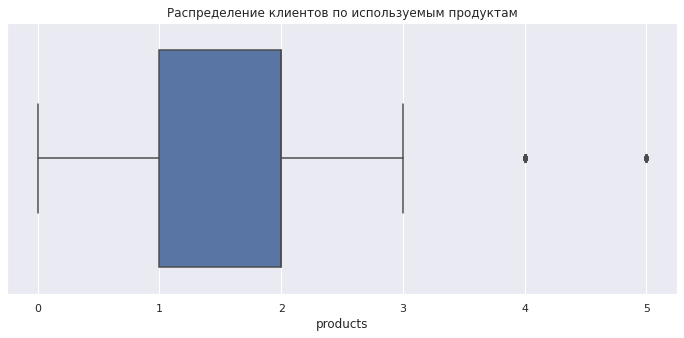

In [36]:
#Создание диаграммы размаха для столбца 'products'
sns.boxplot(x='products',data=data).set(title='Распределение клиентов по используемым продуктам')
plt.show()

**Вывод**

Удалим крайние значения столбца 'products'

In [37]:
#Удаление аномальных значений в столбце 'products'
print('Количество строк до удаления выбросов:', len(data))
data = data.loc[((data['products'] != 5)&(data['products'] != 0))]
print('Количество строк после удаления выбросов:', len(data))

Количество строк до удаления выбросов: 9210
Количество строк после удаления выбросов: 9190


In [38]:
# Расчитываем долю удаленных значений
print ('Доля удаленных значений:', '{:.1%}'.format((10000-9190)/10000))

Доля удаленных значений: 8.1%


**Вывод по предобработке**

На этапе предобработке были изучены данные из представленного датасета. Исходный дата сет содержал 10000 строк. Датасет содержит корректные типы данных, но наименование столбцов было приведено к единому стилю. Также были заменены категориальные данные на бинарные

Не были выявлены явные дубликаты, но было установлено 73 дубля по столбцу 'user_id'. В связи с тем, что не удалось с точностью установить происхождение данных дублей, а также с тем, что они составляют 0,7% от всего датасета, их было решено оставить. 

Были выявлены пропуски в столбце 'age' (26 пропусков). В связи с тем, что пропуски составили 0,26% от всего датасета, а также с тем, что данный столбец планируется использовать для сегментации, данные пропуски были удалены. Пропуски в столбце 'balance' было решено не удалять, т.к. их 2279 штук и вероятнее всего это пользователи кредитных карт, а также невозможность заполнения их 'синтетическими' данными, без сильного искажения общих результатов.

Аномальные значения в столбцах 'balance', 'est_salary' были выделены в отдельный датасет VIP-клиентов. Аномальные значения в столбце 'products' были удалены. После предобработки из изначального датасеты было удалено 8.1%

## Иследовательский анализ

Сгруппируем данные по оттоку клиентов

In [39]:
#Группировка данных по оттоку
display(data.groupby('churn').agg('mean'))
display(data_vip.groupby('churn').agg('mean'))

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль
churn,,,,,,,,,,,,,
0,"171,989.00",842.46,0.46,42.97,2.42,"574,146.06",1.76,0.71,0.48,"120,510.91",0.15,0.28,0.57
1,"170,327.59",855.99,0.64,41.28,3.69,"776,763.29",2.32,0.57,0.70,"122,333.10",0.16,0.25,0.60


,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,Ростов,Рыбинск,Ярославль
churn,,,,,,,,,,,,,
0,"171,309.29",886.46,0.56,43.91,1.85,"4,474,875.47",1.62,0.70,0.47,"526,643.00",0.04,0.22,0.74
1,"176,021.16",916.22,0.75,42.68,4.28,"3,779,189.99",2.67,0.41,0.72,"338,719.78",0.08,0.20,0.72


**Вывод**

Банк покидают клиенты с более высоким скорингом, имеющие больше 3 объектов собственности, с высоким средним балансом, пользующиеся болеt чем 2 продуктами банка, средняя заработная плата которых выше средней заработной платой остающихся клиентов. Так же стоит отметить, что средний возраст ушедших клиентов ниже чем у оставшихся, но при этом оставшиеся клиенты чаще пользуются кредитными картами

Похожая динамика в сегменте VIP-клиентов, с той лишь особенностью, что у покидающих банк клиентов баланс и средняя зарплата ниже, чем у остающихся


Для дальнейшего анализа построим Матрицу корреляций, для оценки влияния различных признаков на отток клиентов

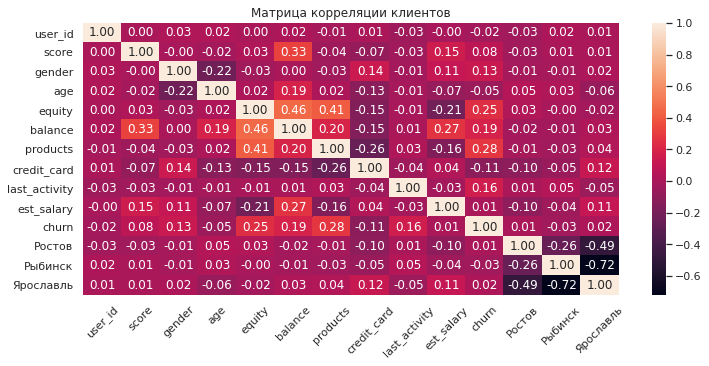

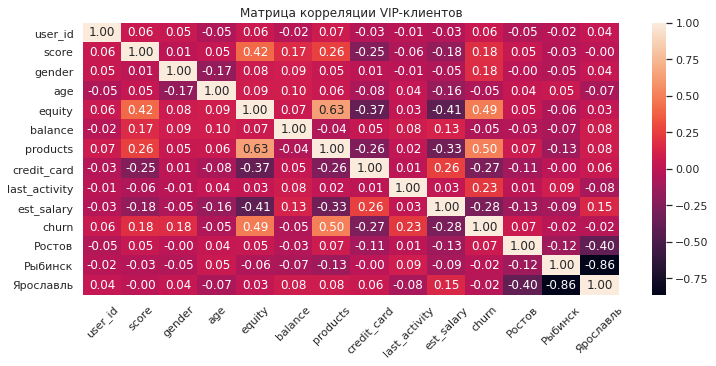

In [40]:
#Создание матрицы корреляции
sns.heatmap(data.corr(), annot = True, fmt = '0.2f')
plt.title('Матрица корреляции клиентов')
plt.xticks(rotation = 45)
plt.show()

sns.heatmap(data_vip.corr(), annot = True, fmt = '0.2f')
plt.title('Матрица корреляции VIP-клиентов')
plt.xticks(rotation = 45)
plt.show()

**Вывод**

Согласно шкале Чеддока теснота связи между двумя величинами определяется следующим образом: 0 – полное отсутствие связи; 0 – 0.3 – очень слабая; 0.3 – 0.5 – слабая; 0.5 – 0.7 – средняя; 0.7 – 0.9 – высокая; 0.9 – 1 – очень высокая

У клиентов банка по влиянию на отток наибольшая корреляция у **Продуктов банка** (products) - 0.28 (близкая к слабой), далее идут **Количество объектов собственности** (equity) - 0.25 (очень слабая); **Баланс** (balance) - 0.19 (очень слабая); **Активность** (last_activity) - 0.16 (очень слабая); **Пол**(gender) -  0.13 (очень слабая) и **Кредитная карта** (credit_card) - -0.11 (очень слабая обратная).Таким образом самое высокое значение на отток клиентов влиеят количество продуктов банка, слабая отрицательная корреляция у кредитных карт говорит о том, что наличие коидитной карты характерно для клиентов не склонных к уходу из банка

У VIP-клиентов по влиянию на отток наибольшая корреляция у **Продуктов банка** (products) - 0.5 (слабая, близкая к средней), далее идут **Количество объектов собственности** (equity) - 0.49 (слабая, близкая к средней); **Активность** (last_activity) - 0.23 (очень слабая); **Скоринг** (score) - 0.18 (очень слабая); **Пол**(gender) -  0.18 (очень слабая); **Заработная плата** (est_salary) - -0.28(очень слабая обратная) и **Кредитная карта** (credit_card) - -0.27 (очень слабая обратная). Таким образом у VIP-клиентов теснота корреляционных связей более выражена по тем же признакам, как и у остальных клиентов. Так же на отток VIP-клиентов не влияет баланс, а к отрицательной корреляции кроме кредитных карт добавилась заработная плата, чем выше заработная плата, тем реже уходят клиенты

Далее построим диаграммы для количественных признаков, а также графики с долей для категориальных значений

In [41]:
#Создание функции для визуализации числовых показателей
def numerical_indicators(dataset,dataset_vip,column, title):
    fig, ax = plt.subplots(figsize = (15, 5))
    
    sns.kdeplot(dataset[dataset['churn']==0][column], label = 'Текущие клиенты', common_norm=False, ax = plt.subplot(1, 2, 1))
    sns.kdeplot(dataset[dataset['churn']==1][column], label = 'Ушедшие клиенты', color = '#955534', common_norm=False, ax = plt.subplot(1, 2, 1))
    plt.xlabel('')
    plt.ylabel('Количество клиентов')
    plt.legend()
    
    
    sns.kdeplot(dataset_vip[dataset_vip['churn']==0][column], label = 'Текущие клиенты', common_norm=False, ax = plt.subplot(1, 2, 2))
    sns.kdeplot(dataset_vip[dataset_vip['churn']==1][column], label = 'Ушедшие клиенты', color = '#955534', common_norm=False, ax = plt.subplot(1, 2, 2))
    plt.xlabel('')
    plt.ylabel('Количество VIP-клиентов')
    plt.legend()
    
   
    fig.suptitle(title)
    plt.show()

In [42]:
#Создание датафрейма из названия столбцов и наименования графиков
data_numeric = pd.DataFrame({'column' : ['score', 'age', 'equity', 'balance', 'products', 'est_salary'], 
                        'title' : ['Cкорринг', 'Возраст', 'Количество объектов недвижимости', 'Баланс', 
                                   'Количество продуктов', 'Заработная плата']})

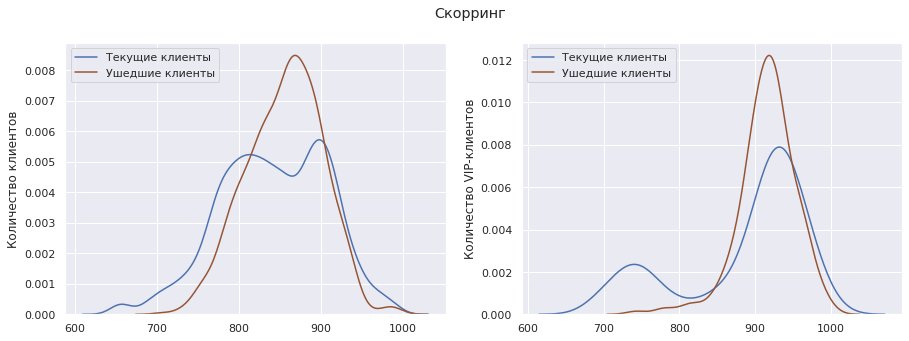

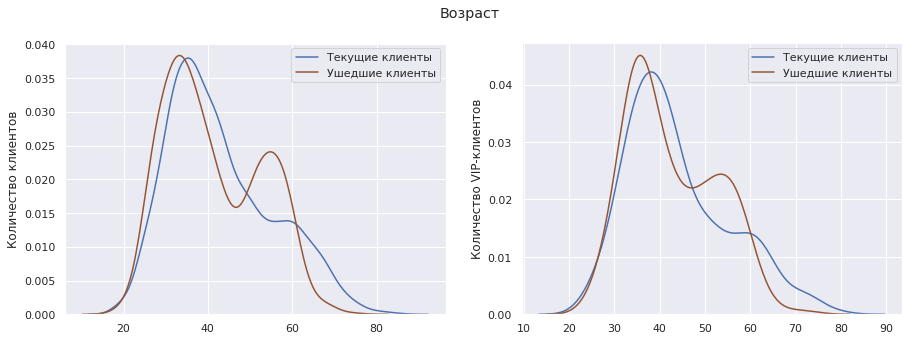

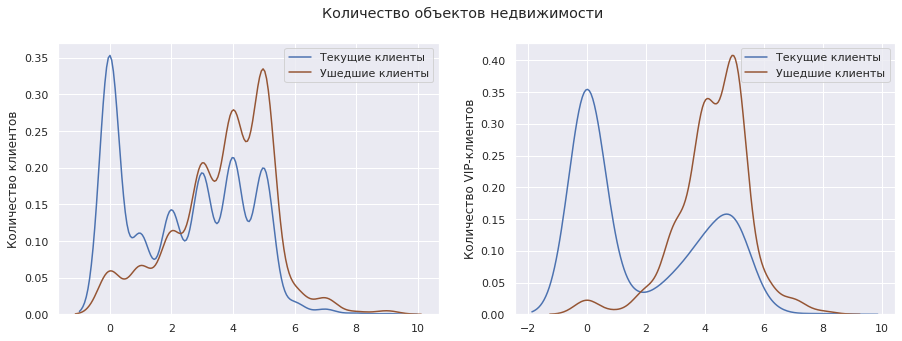

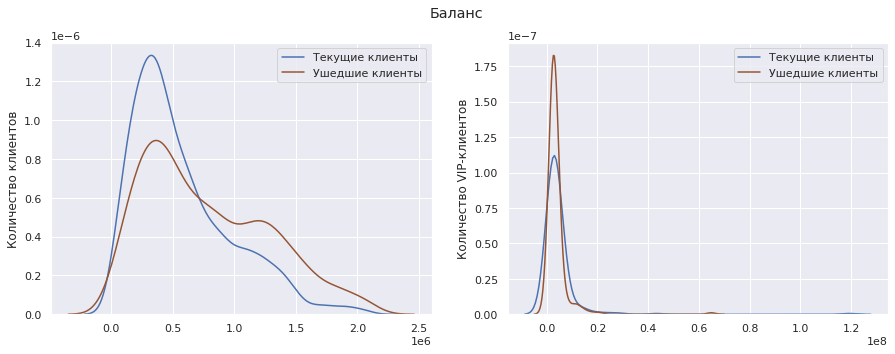

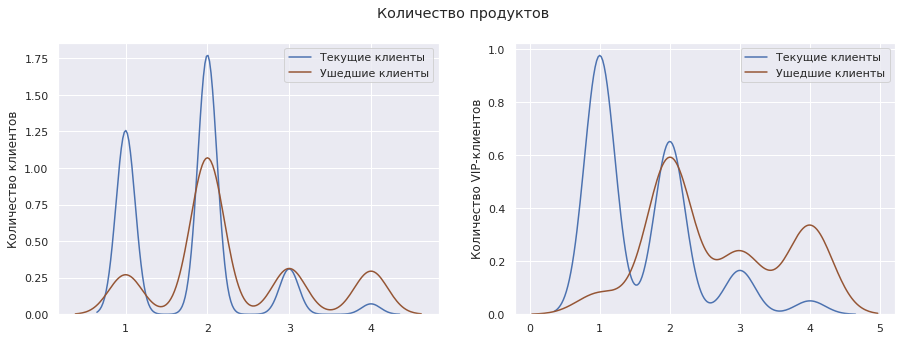

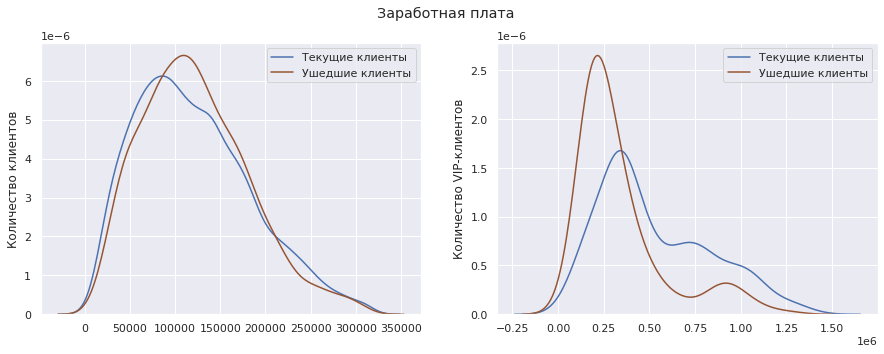

In [43]:
#Вывод графиков
for index, row in data_numeric.iterrows():
    numerical_indicators(data, data_vip, row[0], row[1])

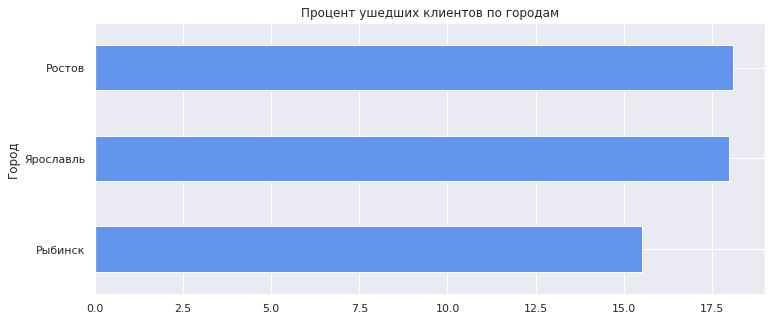

,sum,count,share
city,,,
Рыбинск,391,2519,15.52
Ярославль,953,5300,17.98
Ростов,248,1371,18.09


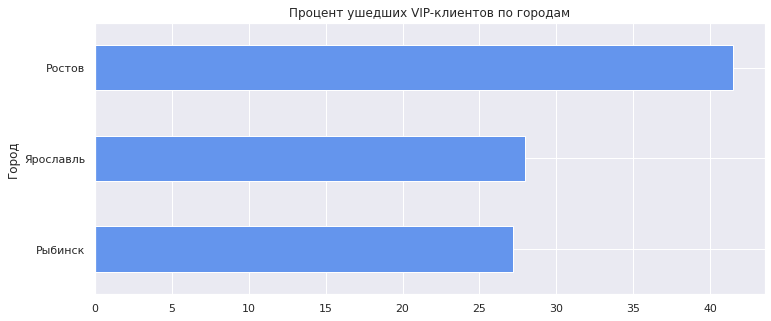

,sum,count,share
city,,,
Рыбинск,44,162,27.16
Ярославль,157,561,27.99
Ростов,17,41,41.46


In [44]:
#Создание датафреймов для подсчета доли по городам
city_churn = data.pivot_table (index = 'city', values = 'churn', aggfunc =['sum', 'count'])
city_churn.columns = city_churn.columns.droplevel(level=1)
city_churn ['share'] = city_churn['sum']/city_churn['count']*100
city_churn=city_churn.sort_values('share')

city_vip_churn = data_vip.pivot_table (index = 'city', values = 'churn', aggfunc =['sum', 'count'])
city_vip_churn.columns = city_vip_churn.columns.droplevel(level=1)
city_vip_churn ['share'] = city_vip_churn['sum']/city_vip_churn['count']*100
city_vip_churn=city_vip_churn.sort_values('share')

#Постройка графиков
city_churn['share'].plot (kind='barh', title = 'Процент ушедших клиентов по городам',
    xlabel = 'Город', ylabel = 'Процент ушедших клиентов', color = 'cornflowerblue');
plt.show()
display(city_churn)


city_vip_churn['share'].plot (kind='barh', title = 'Процент ушедших VIP-клиентов по городам',
    xlabel = 'Город', ylabel = 'Процент ушедших клиентов', color = 'cornflowerblue');
plt.show()
display(city_vip_churn)

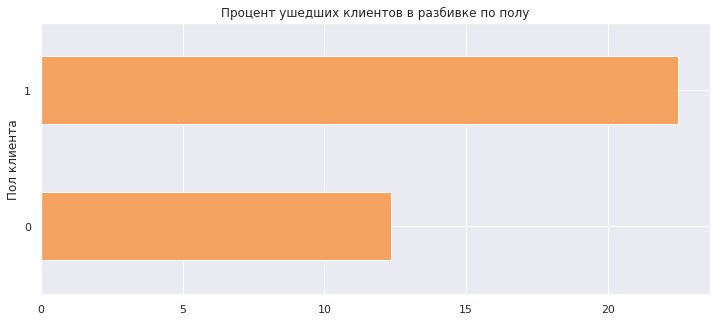

,sum,count,share
gender,,,
0,577,4676,12.34
1,1015,4514,22.49


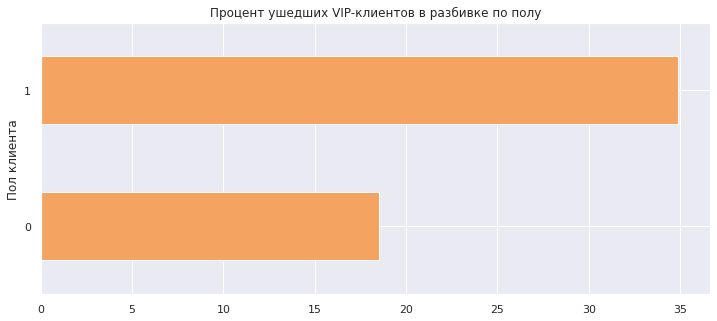

,sum,count,share
gender,,,
0,55,297,18.52
1,163,467,34.90


In [45]:
#Создание датафреймов для подсчета доли по полу
gender_churn = data.pivot_table (index = 'gender', values = 'churn', aggfunc =['sum', 'count'])
gender_churn.columns = gender_churn.columns.droplevel(level=1)
gender_churn ['share'] = gender_churn['sum']/gender_churn['count']*100
gender_churn=gender_churn.sort_values('share')

gender_vip_churn = data_vip.pivot_table (index = 'gender', values = 'churn', aggfunc =['sum', 'count'])
gender_vip_churn.columns = gender_vip_churn.columns.droplevel(level=1)
gender_vip_churn ['share'] = gender_vip_churn['sum']/gender_vip_churn['count']*100
gender_vip_churn=gender_vip_churn.sort_values('share')

# Построим столбчатую диаграмму:
gender_churn['share'].plot (kind='barh', title = 'Процент ушедших клиентов в разбивке по полу',
    xlabel = 'Пол клиента', ylabel = 'Процент ушедших клиентов', color = 'sandybrown');
plt.show()
display(gender_churn)

# Построим столбчатую диаграмму:
gender_vip_churn['share'].plot (kind='barh', title = 'Процент ушедших VIP-клиентов в разбивке по полу',
    xlabel = 'Пол клиента', ylabel = 'Процент ушедших клиентов', color = 'sandybrown');
plt.show()
display(gender_vip_churn)

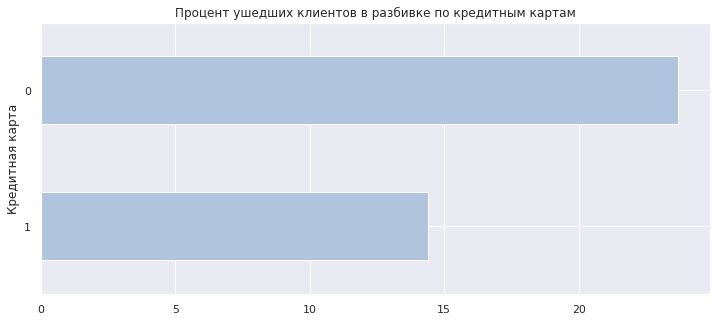

,sum,count,share
credit_card,,,
1,905,6292,14.38
0,687,2898,23.71


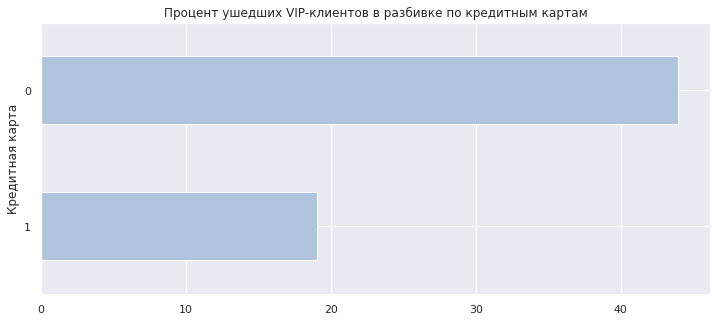

,sum,count,share
credit_card,,,
1,90,473,19.03
0,128,291,43.99


In [46]:
#Создание датафреймов для подсчета доли по кредитным картам
credit_churn = data.pivot_table (index = 'credit_card', values = 'churn', aggfunc =['sum', 'count'])
credit_churn.columns = credit_churn.columns.droplevel(level=1)
credit_churn ['share'] = credit_churn['sum']/credit_churn['count']*100
credit_churn=credit_churn.sort_values('share')

credit_vip_churn = data_vip.pivot_table (index = 'credit_card', values = 'churn', aggfunc =['sum', 'count'])
credit_vip_churn.columns = credit_vip_churn.columns.droplevel(level=1)
credit_vip_churn ['share'] = credit_vip_churn['sum']/credit_vip_churn['count']*100
credit_vip_churn=credit_vip_churn.sort_values('share')

# Построим столбчатую диаграмму:
credit_churn['share'].plot (kind='barh', title = 'Процент ушедших клиентов в разбивке по кредитным картам',
    xlabel = 'Кредитная карта', ylabel = 'Процент ушедших клиентов', color = 'lightsteelblue');
plt.show()
display(credit_churn)

# Построим столбчатую диаграмму:
credit_vip_churn['share'].plot (kind='barh', title = 'Процент ушедших VIP-клиентов в разбивке по кредитным картам',
    xlabel = 'Кредитная карта', ylabel = 'Процент ушедших клиентов',color = 'lightsteelblue');
plt.show()
display(credit_vip_churn)

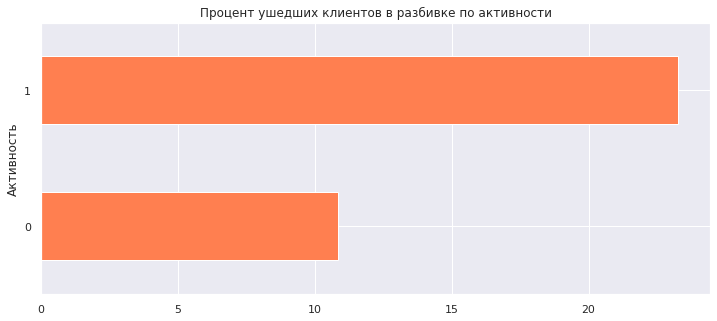

,sum,count,share
last_activity,,,
0,479,4409,10.86
1,1113,4781,23.28


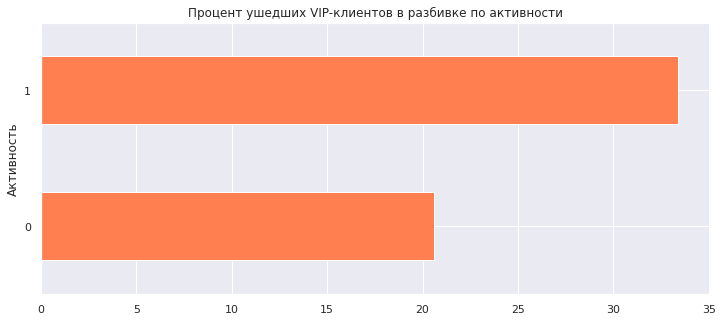

,sum,count,share
last_activity,,,
0,60,347,20.62
1,158,417,33.40


In [47]:
#Создание датафреймов для подсчета доли по активности
activity_churn = data.pivot_table (index = 'last_activity', values = 'churn', aggfunc =['sum', 'count'])
activity_churn.columns = activity_churn.columns.droplevel(level=1)
activity_churn ['share'] = activity_churn['sum']/activity_churn['count']*100
activity_churn=activity_churn.sort_values('share')

activity_vip_churn = data_vip.pivot_table (index = 'last_activity', values = 'churn', aggfunc =['sum', 'count'])
activity_vip_churn.columns = activity_vip_churn.columns.droplevel(level=1)
activity_vip_churn ['share'] = activity_vip_churn['sum']/credit_vip_churn['count']*100
activity_vip_churn=activity_vip_churn.sort_values('share')

# Построим столбчатую диаграмму:
activity_churn['share'].plot (kind='barh', title = 'Процент ушедших клиентов в разбивке по активности',
    xlabel = 'Активность', ylabel = 'Процент ушедших клиентов', color = 'coral');
plt.show()
display(activity_churn)

# Построим столбчатую диаграмму:
activity_vip_churn['share'].plot (kind='barh', title = 'Процент ушедших VIP-клиентов в разбивке по активности',
    xlabel = 'Активность', ylabel = 'Процент ушедших клиентов',color = 'coral');
plt.show()
display(activity_vip_churn)

**Вывод**

**Скоринг** - самый высокий отток клиентов в диапазоне от 800 до 900 баллов, VIP-клиенты от 900 до 950;

**Возраст** - чаще всего уходят клиенты в возрасте 25-40 лет, а также 50-60 лет. У VIP-клиентов пик приходится на возраст 30-40 лет;

**Собственность** - по данному показателю отток обычных клиентов и VIP-клиентов имеют похожую динамику. Чаще всего банк покидают клиенты, имеющие 4-5 объектов недвижимости;

**Баланс** -чаще банк покидают клиенты с балансом от 100000 до 500000 руб., а также наблюдается рост от 1000000 до 1500000 руб. У VIP-клиентов, как показала матрица корреляции баланс не влияет на отток;

**Продукты банка** - отток клиентов, пользующихся 2 продуктами банка заметно превышает все остальные показатели в данной категории. У VIP-клиентов также высокий отток у пользователей 2 продуктами, но также стоит отметить отток у пользователей 4 продуктами;

**Заработная плата** - банк чаще покидают клиенты с заработной платой 75000 - 150000 руб. У VIP-клиентов отток приходится на диапазон зарплат 1000000-4000000, пик приходится на 2000000 руб.

Далее рассмотрим категориальные данные. Ранее было установлено, что процент оттока у обычных клиентов 17%, а у VIP-клиентов 29%

**Город** - у обычных клиентов отток в Рыбинске ниже, чем в двух других городах. Отток в Ярославле и Ростове чуть превышает общий отток и составляет 18%. У в VIP-клиентов сильно выделяется отток в Ростове - 41%;

**Пол** - у обычных клиентов отток у клиентов-женщин значительно ниже общего 12%, у клиентов мужчин превышает общий - 22%. У VIP-клиентов похожая динамика, клиенты-женщины - 18%, клиенты-мужчины-34%;

**Кредитная карта** - по кредитным картам у обычных и VIP-клиентов похожая динамика, клиенты без кредитных карт намного чаще покидают банк 22% и 34% соответственно;

**Активность** - по активности у обычных и VIP-клиентов также похожая динамика, активные клиенты чаще покидают банк 23% и 33% соответственно.

**Вывод по исследовательскому анализу**

Среди обычных клиентов банк покидают из клиенты-мужчины из Ярославля или Ростова, не пользующиеся кредитной картой, являющиеся активными пользователями в возрасте от 25 до 40 лет, имеющие 4-5 объектов недвижимости, пользующихся 2 продуктами банка, имеющие средний скоринг 800-900 баллов и получающие зарплату 75000-150000 руб., а также имеющие баланс до 100000 до 500000 руб.

Среди VIP-клиентов по оттоку выделяются клиенты-мужчины из Ростова не пользующиеся кредитной картой, являющиеся активными пользователями в возрасте от 30 до 40 лет, имеющие 4-5 объектов недвижимости, пользующихся 2 продуктами банка, имеющие средний скоринг 850-900 баллов с заработной платой в районе 2000000 руб.

Далее выделим отдельные сегменты

## Сегментация

В качестве первого сегмента выделим VIP-клиентов наиболее склонных к уходу среди данной категории. Согласно матрице корреляции самые большое влияние на отток оказывают Продукты банка и Количество объектов собственности.

In [48]:
#Вывод количественных показателей
print('Количество клиентов в сегменте:', len(data_vip))
print ('Доля сегмента:', '{:.1%}'.format(len(data_vip)/len(data)))
print ('Доля отточных клиентов:', '{:.1%}'.format(data_vip['churn'].mean()))


Количество клиентов в сегменте: 764
Доля сегмента: 8.3%
Доля отточных клиентов: 28.5%


**Вывод**

Среди VIP-клиентов доля оттока составляет 28.5%

Согласно матрице корреляции на отток обычных пользователей больше всего влияет Продукты банка, Количество объектов собственности, Активность, Пол. Также установлено, что по возрасту есть два всплеска 25-40 лет и 50-60. Отток клиентов-мужчин выше, чем у клиентов-женщин. Также необходимо учесть скоринг отточных клиентов и отсутсвие кредитной карты

In [49]:
#Создание датафрейма по сегменту
data_segment_one = data.loc[((data['products'] >= 2)&(data['equity'] >= 3)&(data['balance'] >= 65000))]

#Вывод количественных показателей
print('Количество клиентов в сегменте:', len(data_segment_one))
print ('Доля сегмента:', '{:.1%}'.format(len(data_segment_one)/len(data)))
print ('Доля отточных клиентов:', '{:.1%}'.format(data_segment_one['churn'].mean()))

Количество клиентов в сегменте: 4225
Доля сегмента: 46.0%
Доля отточных клиентов: 26.2%


In [50]:
# Создание датафрейма по сегменту
data_segment_two = data.loc[((data['gender'] == 1)&(data['age']>=20)&(data['age']<=40))]

#Вывод количественных показателей
print('Количество клиентов в сегменте:', len(data_segment_two))
print ('Доля сегмента:', '{:.1%}'.format(len(data_segment_two)/len(data)))
print ('Доля отточных клиентов:', '{:.1%}'.format(data_segment_two['churn'].mean()))


Количество клиентов в сегменте: 2639
Доля сегмента: 28.7%
Доля отточных клиентов: 22.4%


In [51]:
#Создание датафрейма по сегменту
data_products_three = data.loc[((data['age']>=50)&(data['age']<=60)&(data['score'] >= 800))]

#Вывод количественных показателей
print('Количество клиентов в сегменте:', len(data_products_three))
print ('Доля сегмента:', '{:.1%}'.format(len(data_products_three)/len(data)))
print ('Доля отточных клиентов:', '{:.1%}'.format(data_products_three['churn'].mean()))

Количество клиентов в сегменте: 1209
Доля сегмента: 13.2%
Доля отточных клиентов: 28.8%


**Вывод**

Таким образом получили, что три сегмента по отточных клиентам.

Далее определим сегмент клиентов менее всего подверженных уходу. Это активные клиенты с количеством продуктов менее 1, с таким же количеством объектов собственности, обязательно имеющих кредитную карту

In [52]:
#Создание датафрейма по сегменту
data_products_four = data.loc[((data['products'] <= 1)&(data['equity'] <= 1)&(data['credit_card'] == 1))]

#Вывод количественных показателей
print('Количество клиентов в сегменте:', len(data_products_four))
print ('Доля сегмента:', '{:.1%}'.format(len(data_products_four)/len(data)))
print ('Доля отточных клиентов:', '{:.1%}'.format(data_products_four['churn'].mean()))

Количество клиентов в сегменте: 1616
Доля сегмента: 17.6%
Доля отточных клиентов: 2.6%


Далее проверим охват сегментами пользователей с учетом пересечений

In [53]:
#Объединение сегментов
data_concat=pd.concat([data_vip, data_segment_one, data_segment_two, data_products_three,data_products_four])

#Удаление повторяющихся значений
data_concat=data_concat.drop_duplicates()

#Вывод результата
print ('Доля охвата клиентов с учетом пересечений:', '{:.1%}'.format(len(data_concat)/(len(data)+len(data_vip))))

Доля охвата клиентов с учетом пересечений: 80.2%


**Вывод по сегментации**

В результате проведенного анализа были выделены следующие сегменты

**Клиенты, не покидающие банк**

В сегмент клиентов, которые не склонны к уходу из банка попали клиенты, которые пользуются кредитной картой (чаще всего это единственный продукт банка) и либо не имеют собственности, либо имеют один объект собственности (17.6% от всех клиентов). Доля оттока таких клиентов составляет 2.6%

**Сегмент по оттоку клиентов №1**

В самый крупный сегмент по оттоку попали клиенты пользующиеся 2 и более продуктами банка, имеющие 3 и более объекта недвижимости и баланс выше 100000(46% от всех клиентов). Доля оттока таких клиентов - 26.2%  


**Сегмент по оттоку клиентов №2**

Был выделен сегмент клиентов-мужчин в возрасте от 20 до 40 лет (28.7% от всех клиентов). Доля оттока составляет - 22.4%

**Сегмент по оттоку клиентов №3**

В третий сегмент попали клиенты в возрасте от 50 до 60 лет с скорингом выше 800 баллов (13.2% от всех клиентов). Доля оттока составляет - 28.8%

**Сегмент по оттоку VIP-клиентов**

Среди VIP-клиентов доля оттока составляет 28.5%

## Проверка гипотез

Для дальнейшего анализа проверим ранее сформулированные гипотезы

**Гипотеза №1**

Проверим гипотезу о различии возраста между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Проверим данные на распределение

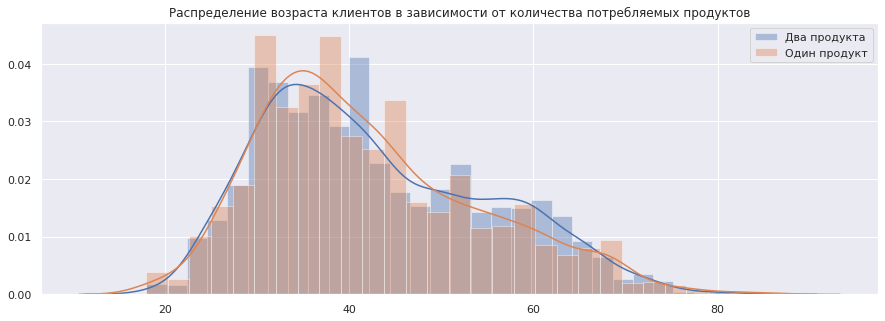

In [54]:
#Создание графика
plt.figure(figsize=(15, 5))

sns.distplot(data[data['products'] == 2]['age'], label = 'Два продукта')
sns.distplot(data[data['products'] == 1]['age'], label = 'Один продукт')

plt.title('Распределение возраста клиентов в зависимости от количества потребляемых продуктов')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Распределение не совсем нормальное, также на графике видны выбросы. Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам будем использовать тест Уилкоксона-Манна-Уитни - st.mannwhitneyu

Сформулируем гипотезы:

**Нулевая гипотеза** - возраст клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним продуктом одинаковый

**Альтернативная гипотеза** - возраст клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним продуктом различается

Уровень статистической значимости - 0.05

In [55]:
#Проверка гипотез
alpha = .05  
results = st.mannwhitneyu(data[data['products'] == 2]['age'], data[data['products'] == 1]['age'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.05861782316414726
Не получилось отвергнуть нулевую гипотезу


In [56]:
#Группировка данных по столбцу 'products' 
data.groupby('products').agg(mean=('age','mean'))

,mean
products,
1,42.13
2,42.73
3,45.63
4,39.10


**Вывод**

Не получилось отвергнуть нулевую гипотезу, возраст клиентов, использующих один или два продукта, одинаков. Это подтверждается данными из датасета

Далее проверим гипотезу о различия баллов кредитного скоринга ушедших и оставшихся клиентов

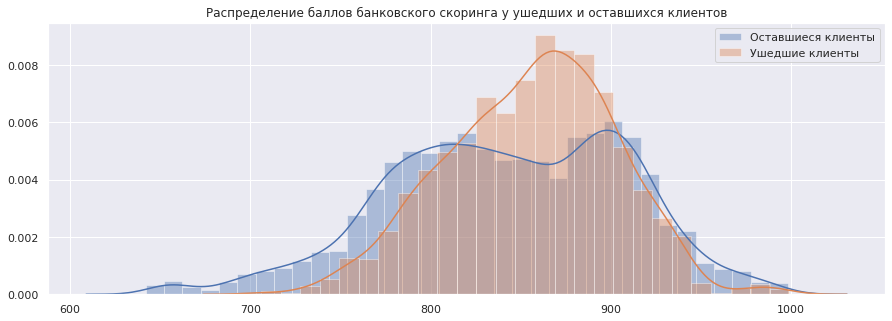

In [57]:
#Создание графика
plt.figure(figsize=(15, 5))

sns.distplot(data[data['churn'] == 0]['score'], label = 'Оставшиеся клиенты')
sns.distplot(data[data['churn'] == 1]['score'], label = 'Ушедшие клиенты')

plt.title('Распределение баллов банковского скоринга у ушедших и оставшихся клиентов')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Для проверки второй гипотезы также будем использовать тест Уилкоксона-Манна-Уитни

Сформулируем гипотезы:

**Нулевая гипотеза** - средний балл кредитного скоринга ушедших и оставшихся клиентов не различается

**Альтернативная гипотеза** - средний балл кредитного скоринга ушедших и оставшихся клиентов различается

Уровень статистической значимости - 0.05

In [58]:
#Проверка гипотез
alpha = .05  

results = st.mannwhitneyu(data[data['churn'] == 0]['score'],data[data['churn'] == 1]['score'])

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  2.779196205371384e-12
Отвергаем нулевую гипотезу


In [59]:
#Группировка данных по столбцу 'churn'
data.groupby('churn').agg(mean=('score', 'mean'))

,mean
churn,
0,842.46
1,855.99


Нулевая гипотеза отвергается, средний балл кредитного скоринга у ушедших и оставшихся клиентов различается. В банке отток клиентов с более высоким кредитным скорингом

## Выводы и рекомендации

**Вывод**

На основании данных предоставленных банком "Метанпромбанк", был произведен анализ клиентов банка и определены сегменты по оттоку клиентов. Банк предоставил данные о 10000 клиентов, средний отток клиентов составляет 18%. Были выявлены пропуски в столбце с балансом, также у данных клиентов отсутствует оценка имеющейся собственности, таким образом это пользователи не "залоговых" кредиты. Также категориальные данные были заменены на количественные, были выявлены значительные выбросы по Балансу и Заработной плате. Данные клиенты были выделены в отдельную категорию VIP-клиентов, для отдельного изучения. После проведения предобработки из изначального датасеты было удалено 8.1% данных. Средний отток составил: по обычным клиентам 17%, по VIP-клиентам 29%

На этапе исследовательского анализа с помощью матрицы корреляции были определены основные признаки, влияющие на клиентов в обеих категориях и составлены их портреты:

   - обычные клиенты - клиенты-мужчины, не пользующиеся кредитной картой, являющиеся активными пользователями в возрасте от 25 до 40 лет, а также 50-60 лет, имеющие 4-5 объектов недвижимости, пользующихся 2 продуктами банка, имеющие средний скоринг 800-900 баллов;

   - VIP-клиенты - клиенты-мужчины, не пользующиеся кредитной картой, являющиеся активными пользователями в возрасте от 30 до 40 лет, имеющие 4-5 объектов недвижимости, пользующихся 2 продуктами банка, имеющие средний скоринг 850-900 баллов.

Далее были выделены сегменты клиентов по оттоку:

**Клиенты, не покидающие банк** - клиенты, которые пользуются кредитной картой (чаще всего это единственный продукт банка) и либо не имеют собственности, либо имеют один объект собственности, со скорингом ниже 800 баллов. Доля оттока таких клиентов составляет 2.6%

В целом можно отметить, что отток клиентов пользующихся кредитной картой значительно ниже, чем у клиентов без такой карты 

**Сегмент по оттоку клиентов №1** -клиенты пользующиеся 2 и более продуктами банка, имеющие 3 и более объекта недвижимости и баланс выше 65000. Доля оттока таких клиентов составляет 26.2%.

В качестве рекомендаций в данном сегменте можно предложить: 
  - предложить оформить кредитную карту;
  - предложить специальные условия по страхованию объектов собственности;
  - предложить льготные условия по рефинансированию текущих кредитов;
  - предложить специальные условия для владельцев зарплатных карт банка;
  - специальное предложение по вкладам;
  - проводить активную рекламную компанию по новым и льготным продуктам
  
**Сегмент по оттоку клиентов №2** - клиенты-мужчины в возрасте от 20 до 40 лет. Доля оттока таких клиентов составляет 22.4%.

В качестве рекомендаций в данном сегменте можно предложить: 
  - предложить оформить кредитную карту;
  - предложить программу лояльности с повышенным кашбеком в специализированных магазинах (АЗС, магазины автозапчастей, магазины инструментов, магазин для рыболовов и т.д.); 
  - проводить активную рекламную компанию по новым и льготным продуктам;
  - предложить специальные условия для владельцев зарплатных карт банка

**Сегмент по оттоку клиентов №3** - клиенты в возрасте от 50 до 60, со скорингом выше 800. Доля оттока составляет 28.8%

В качестве рекомендаций в данном сегменте можно предложить: 
  - повысить ставку по вкладам или программу пенсионных накоплений;
  - предложить оформить кредитную карту;
  - предложить специальные условия по страхованию объектов собственности;
  - предложить льготные условия по рефинансированию текущих кредитов;
  - предложить специальную дебетовую программу для клиентов пенсионного и предпенсионного возраста

**Сегмент по оттоку VIP-клиентов** - основные характеристики сектора VIP-клиентов был описан выше. Доля оттока составляет - 28.5% 

В качестве рекомендаций в данном сегменте можно предложить: 
  - предложить услуги постоянного индивидуального менеджера;
  - предложить специальные условия по страхованию объектов собственности и вкладов;
  - предложить льготные условия по рефинансированию текущих кредитов;
  - предложить льготные инвестиционные программы
  - предложить индивидуальные программы лояльности
  
Также были произведены проверки двух гипотез: 

 - гипотеза различия возраста между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним (нет различий в возрасте);
 - гипотеза различия баллов кредитного скоринга ушедших и оставшихся клиентов (есть различия в скоринге)
 
Результаты гипотез подтверждаются данными во время анализа
 
**Общая рекомендация**

В целом рекомендуется провести проверку качества оказания услуг, стараться сделать предоставление услуг более удобным (разработка и улучшение приложения Банка). В целом можно проанализировать работу банков-конкурентов куда уходят клиенты